#### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import mean_squared_error

#### 2. Read Data

In [13]:
df_zillow = pd.read_csv('State_Zhvi_SingleFamilyResidence.csv')
df_zillow.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,9,California,1,161705.0,161250.0,160895.0,160863.0,161032.0,161336.0,161592.0,...,555303,556553,557704,558774,557899,557280,557356,559531,561859,565250
1,54,Texas,2,97690.0,97700.0,97726.0,97769.0,97876.0,98092.0,98349.0,...,204506,205082,205659,206227,206789,207307,207903,208173,208470,208656
2,43,New York,3,121143.0,120794.0,120428.0,120149.0,120041.0,120103.0,120237.0,...,268478,269589,270730,271569,272068,272336,272442,272525,272779,273294
3,14,Florida,4,104015.0,104082.0,104180.0,104288.0,104392.0,104506.0,104694.0,...,253080,253654,254112,254598,255099,255438,255799,256392,257286,258277
4,21,Illinois,5,138341.0,138263.0,138565.0,138632.0,138902.0,139382.0,139992.0,...,203134,203876,204259,204319,204182,203999,203745,203588,203471,203598


In [11]:
df_zillow.describe()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.0000,47.000000,47.000000,47.000000,47.000000,...,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,115506.106383,115466.404255,115508.510638,115610.425532,115821.680851,116089.0000,116366.255319,116634.787234,116922.340426,117244.000000,...,257972.176471,258983.647059,259844.274510,260533.509804,260992.45098,261451.117647,261890.176471,262370.549020,262881.372549,263622.666667
std,38290.288140,37941.031729,37572.812434,37285.148392,37088.365465,36995.2633,36900.129673,36812.169143,36760.631521,36750.515958,...,131755.960462,132025.084224,132241.425244,132226.488618,131973.46884,131858.802610,131738.554809,131814.458888,131775.376273,131928.916587
min,61714.000000,61792.000000,61762.000000,61619.000000,61532.000000,61533.0000,61602.000000,61736.000000,61852.000000,62041.000000,...,105308.000000,105720.000000,106094.000000,106429.000000,106746.00000,107057.000000,107446.000000,107783.000000,107725.000000,107601.000000
25%,87357.500000,87606.500000,88030.000000,88501.500000,88978.500000,89355.0000,89749.500000,90199.000000,90573.000000,90912.500000,...,167848.500000,168825.500000,169882.500000,170814.500000,171565.50000,172041.500000,172469.500000,172849.500000,173258.500000,173613.000000
50%,107893.000000,107704.000000,107798.000000,107577.000000,107534.000000,107923.0000,106847.000000,106464.000000,106944.000000,107390.000000,...,238054.000000,238212.000000,238354.000000,238863.000000,239356.00000,239886.000000,240522.000000,241093.000000,241657.000000,242755.000000
75%,135471.500000,135726.000000,136219.000000,136665.000000,137182.000000,137807.0000,138549.000000,139338.500000,140137.500000,140903.500000,...,296826.000000,298139.500000,299682.000000,300769.500000,301779.00000,301945.500000,302114.500000,302309.000000,303522.500000,304703.500000
max,260755.000000,258151.000000,255146.000000,252456.000000,250434.000000,249246.0000,247826.000000,246702.000000,245760.000000,245060.000000,...,728142.000000,731680.000000,735646.000000,736741.000000,735314.00000,735427.000000,735861.000000,737124.000000,737315.000000,738025.000000


#### 3. Data Manipulation

In [14]:
# Remove unnecessary columns
df_zillow = df_zillow.drop(['RegionID','SizeRank'],axis = 1)
df_zillow.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,California,161705.0,161250.0,160895.0,160863.0,161032.0,161336.0,161592.0,161715.0,161882.0,...,555303,556553,557704,558774,557899,557280,557356,559531,561859,565250
1,Texas,97690.0,97700.0,97726.0,97769.0,97876.0,98092.0,98349.0,98585.0,98817.0,...,204506,205082,205659,206227,206789,207307,207903,208173,208470,208656
2,New York,121143.0,120794.0,120428.0,120149.0,120041.0,120103.0,120237.0,120388.0,120553.0,...,268478,269589,270730,271569,272068,272336,272442,272525,272779,273294
3,Florida,104015.0,104082.0,104180.0,104288.0,104392.0,104506.0,104694.0,104934.0,105210.0,...,253080,253654,254112,254598,255099,255438,255799,256392,257286,258277
4,Illinois,138341.0,138263.0,138565.0,138632.0,138902.0,139382.0,139992.0,140584.0,141113.0,...,203134,203876,204259,204319,204182,203999,203745,203588,203471,203598


In [15]:
# Transpose the data and create a year column
df_zillow = df_zillow.transpose()
df_zillow.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
RegionName,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
1996-04,161705,97690,121143,104015,138341,95563,92759,90418,102771,110287,...,109218,128266,NaN,130926,84357,130739,NaN,109810,194072,NaN
1996-05,161250,97700,120794,104082,138263,95303,93018,90962,103039,110589,...,109267,127809,NaN,130753,84009,131374,NaN,109475,192427,NaN
1996-06,160895,97726,120428,104180,138565,95173,93255,91478,103370,111021,...,109546,127456,NaN,130964,84356,132063,NaN,109166,190747,NaN
1996-07,160863,97769,120149,104288,138632,95092,93474,91929,103708,111545,...,110013,127224,NaN,131683,84732,132408,NaN,108909,189419,NaN


In [16]:
# Make the first row as column name
df_zillow.columns = df_zillow.iloc[0]
df_zillow = df_zillow[1:]
df_zillow.head()

RegionName,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
1996-04,161705,97690,121143,104015,138341,95563,92759,90418,102771,110287,...,109218,128266,NaN,130926,84357,130739,NaN,109810,194072,NaN
1996-05,161250,97700,120794,104082,138263,95303,93018,90962,103039,110589,...,109267,127809,NaN,130753,84009,131374,NaN,109475,192427,NaN
1996-06,160895,97726,120428,104180,138565,95173,93255,91478,103370,111021,...,109546,127456,NaN,130964,84356,132063,NaN,109166,190747,NaN
1996-07,160863,97769,120149,104288,138632,95092,93474,91929,103708,111545,...,110013,127224,NaN,131683,84732,132408,NaN,108909,189419,NaN
1996-08,161032,97876,120041,104392,138902,95196,93753,92430,104043,112121,...,110428,127174,NaN,132360,84867,133117,NaN,108794,188338,NaN


In [17]:
df_zillow.iloc[0].index.name = ''
df_zillow.head()

,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
1996-04,161705,97690,121143,104015,138341,95563,92759,90418,102771,110287,...,109218,128266,NaN,130926,84357,130739,NaN,109810,194072,NaN
1996-05,161250,97700,120794,104082,138263,95303,93018,90962,103039,110589,...,109267,127809,NaN,130753,84009,131374,NaN,109475,192427,NaN
1996-06,160895,97726,120428,104180,138565,95173,93255,91478,103370,111021,...,109546,127456,NaN,130964,84356,132063,NaN,109166,190747,NaN
1996-07,160863,97769,120149,104288,138632,95092,93474,91929,103708,111545,...,110013,127224,NaN,131683,84732,132408,NaN,108909,189419,NaN
1996-08,161032,97876,120041,104392,138902,95196,93753,92430,104043,112121,...,110428,127174,NaN,132360,84867,133117,NaN,108794,188338,NaN


In [18]:
# convert the Date index value from String to Datetime type
df_zillow.index = pd.to_datetime(df_zillow.index) 
df_zillow.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', length=285, freq=None)

In [19]:
df_zillow.index.name = 'Date'
df_zillow.head()

,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,161705,97690,121143,104015,138341,95563,92759,90418,102771,110287,...,109218,128266,NaN,130926,84357,130739,NaN,109810,194072,NaN
1996-05-01,161250,97700,120794,104082,138263,95303,93018,90962,103039,110589,...,109267,127809,NaN,130753,84009,131374,NaN,109475,192427,NaN
1996-06-01,160895,97726,120428,104180,138565,95173,93255,91478,103370,111021,...,109546,127456,NaN,130964,84356,132063,NaN,109166,190747,NaN
1996-07-01,160863,97769,120149,104288,138632,95092,93474,91929,103708,111545,...,110013,127224,NaN,131683,84732,132408,NaN,108909,189419,NaN
1996-08-01,161032,97876,120041,104392,138902,95196,93753,92430,104043,112121,...,110428,127174,NaN,132360,84867,133117,NaN,108794,188338,NaN


In [20]:
# Read Housing Price Index file
# Downloaded from https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx#mpo
hpi = pd.read_excel('HPI_1996_2019.xlsx')
hpi.head()

,Month,HPI
0,1996-04-01,114.99
1,1996-05-01,115.26
2,1996-06-01,115.37
3,1996-07-01,115.79
4,1996-08-01,115.78


In [26]:
hpi_month = hpi.set_index('Month')
hpi_month.head()

,HPI
Month,
1996-04-01,114.99
1996-05-01,115.26
1996-06-01,115.37
1996-07-01,115.79
1996-08-01,115.78


In [47]:
# concatenate two tables
temp = pd.concat([df_zillow,hpi_month],axis=1)
temp.head()

,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming,HPI
1996-04-01,161705,97690,121143,104015,138341,95563,92759,90418,102771,110287,...,128266,NaN,130926,84357,130739,NaN,109810,194072,NaN,114.99
1996-05-01,161250,97700,120794,104082,138263,95303,93018,90962,103039,110589,...,127809,NaN,130753,84009,131374,NaN,109475,192427,NaN,115.26
1996-06-01,160895,97726,120428,104180,138565,95173,93255,91478,103370,111021,...,127456,NaN,130964,84356,132063,NaN,109166,190747,NaN,115.37
1996-07-01,160863,97769,120149,104288,138632,95092,93474,91929,103708,111545,...,127224,NaN,131683,84732,132408,NaN,108909,189419,NaN,115.79
1996-08-01,161032,97876,120041,104392,138902,95196,93753,92430,104043,112121,...,127174,NaN,132360,84867,133117,NaN,108794,188338,NaN,115.78


In [50]:
temp2 = temp.loc[:,"California":"Wyoming"].div(temp["HPI"], axis=0)*283
temp2.head()

,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
1996-04-01,397970,240423,298143,255990,340469,235189,228288,222526,252928,271426,...,268795,315673,NaN,322220,207610,321760,NaN,270252,477627,NaN
1996-05-01,395920,239885,296588,255554,339480,233999,228389,223341,252994,271531,...,268285,313812,NaN,321040,206269,322565,NaN,268796,472470,NaN
1996-06-01,394672,239720,295407,255551,339897,233457,228752,224393,253564,272332,...,268714,312647,NaN,321252,206923,323948,NaN,267782,467898,NaN
1996-07-01,393162,238955,293654,254888,338828,232412,228458,224682,253471,272625,...,268881,310946,NaN,321844,207092,323616,NaN,266182,462955,NaN
1996-08-01,393609,239237,293415,255164,339517,232687,229160,225926,254311,274056,...,269918,310850,NaN,323526,207440,325377,NaN,265924,460353,NaN


In [53]:
df_zillow = temp2
df_zillow.head()

,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
1996-04-01,397970,240423,298143,255990,340469,235189,228288,222526,252928,271426,...,268795,315673,NaN,322220,207610,321760,NaN,270252,477627,NaN
1996-05-01,395920,239885,296588,255554,339480,233999,228389,223341,252994,271531,...,268285,313812,NaN,321040,206269,322565,NaN,268796,472470,NaN
1996-06-01,394672,239720,295407,255551,339897,233457,228752,224393,253564,272332,...,268714,312647,NaN,321252,206923,323948,NaN,267782,467898,NaN
1996-07-01,393162,238955,293654,254888,338828,232412,228458,224682,253471,272625,...,268881,310946,NaN,321844,207092,323616,NaN,266182,462955,NaN
1996-08-01,393609,239237,293415,255164,339517,232687,229160,225926,254311,274056,...,269918,310850,NaN,323526,207440,325377,NaN,265924,460353,NaN


In [130]:
df_zillow.to_csv('zillow_after_HPI.csv')

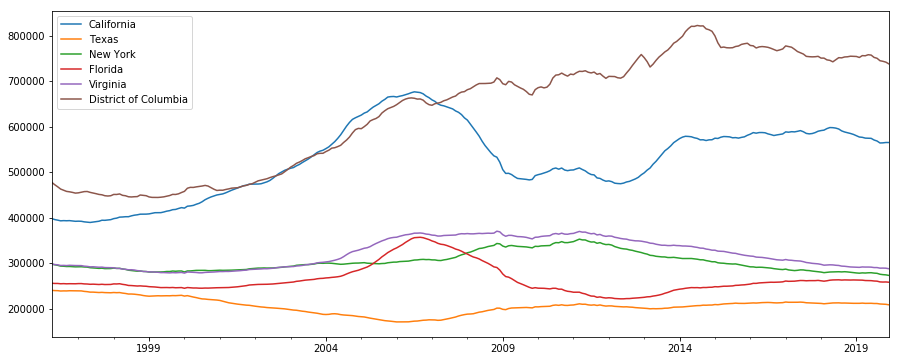

In [54]:
# Original Series
# Since I am interested in 6 states below, i will plot these 6 states here
selected_states = ['California','Texas','New York','Florida','Virginia','District of Columbia']
df_zillow[selected_states].plot(figsize=(15,6))

#### 4. Preparing for Time Series Analysis

I will use ARIMA model for the forcasting. ARIMA stands for ‘Autoregressive Integrated Moving Average’. It explains a given time series based on 
its own past values which are its own lag and lagged forecast error, so it can be used to forecast the
values in the future.(https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)

The ARIMA model is composed of 3 terms - p, d, q. p is the order of the Autoregressive 
term, q is the order of the Moving Average term, d is the number of differencing required to make the 
time series stationary.(https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)


Before implementing the ARIMA model, the data needs to be stationary. Most series data at any 
time can be stationary after a series of transformation. Differencing is one way to help data 
become stationary. ADH test augments Dicky Fuller test which is used to check the stationary. 
The housing prices are in an increasing trend, so monthly return is used as first order differencing. 
And if the ADH test shows that the data is still non-stationary, I will use second order differencing
which is simply subtracting the previous value from the current value. 


##### 4.1 Calculate the Monthly Return 

Since median housing price is mostlikely not stationary(e.g. positive or negative trend), I will first try
the monthly return to see its stationary.

In [55]:
df_monthly_returns = df_zillow.pct_change()
df_monthly_returns.head()

,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
1996-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-05-01,-0.005150,-0.002240,-0.005217,-0.001700,-0.002905,-0.005057,0.000443,0.003660,0.000259,0.000389,...,-0.001895,-0.005897,NaN,-0.003661,-0.006458,0.002503,NaN,-0.005386,-0.010799,NaN
1996-06-01,-0.003153,-0.000688,-0.003981,-0.000013,0.001229,-0.002316,0.001592,0.004714,0.002256,0.002949,...,0.001597,-0.003713,NaN,0.000659,0.003173,0.004286,NaN,-0.003773,-0.009676,NaN
1996-07-01,-0.003825,-0.003189,-0.005936,-0.002594,-0.003145,-0.004475,-0.001287,0.001285,-0.000369,0.001075,...,0.000620,-0.005441,NaN,0.001843,0.000814,-0.001024,NaN,-0.005973,-0.010564,NaN
1996-08-01,0.001137,0.001181,-0.000813,0.001084,0.002034,0.001180,0.003071,0.005537,0.003317,0.005251,...,0.003859,-0.000307,NaN,0.005228,0.001680,0.005441,NaN,-0.000970,-0.005621,NaN


##### 4.2 ACF Stationary Plot

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def check_stationary_plot(selected_states):
    plt.rcParams.update({'figure.figsize':(9,9), 'figure.dpi':100})
    fig, axes = plt.subplots(2, 2, sharex=False)
    
    # 1st Differencing
    for state in selected_states:
        axes[0, 0].plot(df_monthly_returns[state]); axes[0, 0].set_title('1st Order Differencing')
        plot_acf(df_monthly_returns[state].dropna(),ax=axes[0, 1])
        #plot_pacf(df_monthly_returns[state].dropna(), ax=axes[0,2])
    
    # 2nd Differencing
    for state in selected_states:
        axes[1, 0].plot(df_monthly_returns[state].diff()); axes[1, 0].set_title('2nd Order Differencing')
        plot_acf(df_monthly_returns[state].diff().dropna(),ax=axes[1, 1])
        #plot_pacf(df_monthly_returns[state].diff().dropna(), ax=axes[1,2])
    plt.show()

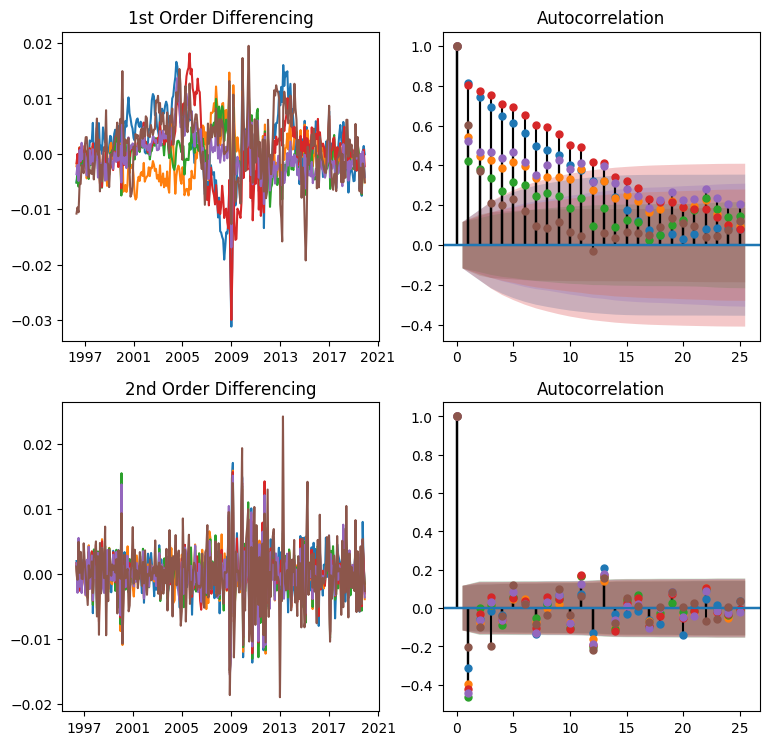

In [57]:
selected_states = ['California','Texas','New York','Florida','Virginia','District of Columbia']
check_stationary_plot(selected_states)

From this plot, we can see that ACF plot for the 1st order differencing(monthly return) is slowely decaying, which means that the future value is heavily dependent on the past value. And the mean and variance is not constant over time, thus it is not stationary. But the ACF for 2nd order differencing(difference between returns) shows most likely stationary. However, we can not just rely on a visual inspection which is not accurate enough to proceed with fitting an ARIMA model. Therefore, it is necessary to conduct an Augmented Dickey-Fuller test for stationarity.

##### 4.3 ADF Test with Number of Differencing

In ADF test, the null hypothesis is the time series possesses a unit root and is non-stationary. So, the P-Value in ADF test is less than the significance level (0.05), you reject the null hypothesis.

In [58]:
from statsmodels.tsa.stattools import adfuller

def ADFTest(selected_states,differencing):
    if differencing == 1:
            print('ADF Test with 1st Order Differencing (monthly return): ')
    else: print('ADF Test with Second Order Differencing : ')
        
    for state in selected_states:
        if differencing == 1:
            result = adfuller((df_monthly_returns[state].dropna()), autolag='AIC')
        elif differencing == 2:
            result = adfuller((df_monthly_returns[state].diff().dropna()), autolag='AIC')
        else: print('Please choose the number of differencing between 1 and 2.')
        print('\n'+ state +': ')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

In [59]:
# 1st Order of Differencing
selected_states = ['California','New York','District of Columbia','Virginia','Texas']
ADFTest(selected_states,1)

ADF Test with 1st Order Differencing (monthly return): 

California: 
ADF Statistic: -3.361130846306349
p-value: 0.012357474869719982
	1%: -3.455
	5%: -2.872
	10%: -2.573

New York: 
ADF Statistic: -3.487899184613756
p-value: 0.008303361830314958
	1%: -3.454
	5%: -2.872
	10%: -2.572

District of Columbia: 
ADF Statistic: -3.348489568040521
p-value: 0.012845317854325302
	1%: -3.455
	5%: -2.872
	10%: -2.573

Virginia: 
ADF Statistic: -1.98968499208667
p-value: 0.29111410471805893
	1%: -3.455
	5%: -2.872
	10%: -2.573

Texas: 
ADF Statistic: -3.089558019361374
p-value: 0.027335654751041737
	1%: -3.454
	5%: -2.872
	10%: -2.572


After 1st order differencing, we failed to reject the null hypothesis, which means it is not stationary. Then we need to conduct
the 2nd order differencing.

In [60]:
# 2nd Order of Differencing
selected_states = ['California','New York','District of Columbia','Virginia','Texas']
ADFTest(selected_states,2)

ADF Test with Second Order Differencing : 

California: 
ADF Statistic: -4.64406307130994
p-value: 0.00010705292053823733
	1%: -3.455
	5%: -2.872
	10%: -2.573

New York: 
ADF Statistic: -6.363398143908009
p-value: 2.443011558029862e-08
	1%: -3.455
	5%: -2.872
	10%: -2.572

District of Columbia: 
ADF Statistic: -6.647025752388883
p-value: 5.234314645648784e-09
	1%: -3.455
	5%: -2.872
	10%: -2.573

Virginia: 
ADF Statistic: -5.977048781311628
p-value: 1.876688601712146e-07
	1%: -3.455
	5%: -2.872
	10%: -2.573

Texas: 
ADF Statistic: -5.810889266844527
p-value: 4.404226586209347e-07
	1%: -3.455
	5%: -2.872
	10%: -2.573


Now, the P-values for all 6 states are less than significant level (0.05). We will use apply 2nd order differencing in our ARIMA model. It is same as  d = 1 if I build a model on the Montly Return Data since it is already differenced once.

#### 5. Build Model - ARIMA Model

##### 5.1 Determine the best order

Here, I will use pm.auto_arima to find out the best order for each state time series data. auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [61]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
def find_best_order(state):
    
    model = pm.auto_arima(df_monthly_returns[state].dropna(), start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=1,              # frequency of series
                          d=1,              # differencing = 1
                          seasonal=False,   # No Seasonality
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)

    print(model.summary())

In [102]:
#find_best_order('Virginia')
#find_best_order('Florida')
#find_best_order('California')
#find_best_order('New York')
#find_best_order('District of Columbia')
find_best_order('Texas')

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2425.419, BIC=-2410.837, Time=0.793 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2327.075, BIC=-2319.784, Time=0.127 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2373.548, BIC=-2362.612, Time=0.149 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2411.940, BIC=-2401.004, Time=0.296 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=-2329.072, BIC=-2325.426, Time=0.112 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-2414.788, BIC=-2396.560, Time=0.316 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2422.384, BIC=-2404.157, Time=0.206 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-2424.805, BIC=-2410.223, Time=0.208 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-2394.701, BIC=-2380.119, Time=0.110 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-

##### 5.2 ARIMA Model

For ARIMA Model, I splitted the data to two sets which are train and test for validation purpose of my model. I used 
last 5 years of data (2015-01 to 2019-12) as a test dataset.

In [63]:
from statsmodels.tsa.stattools import acf
import statsmodels

def forecastvalidation(state,order):
    # Create Training and Test
    train = df_monthly_returns[state][1:225]
    test = df_monthly_returns[state][225:]
    
    # Build Model 
    model = ARIMA(train, order=order) 
    fitted = model.fit(disp=-1)  

    # Forecast last 5 years (Year 2015-2019)
    fc, se, conf = fitted.forecast(60, alpha=0.05)  # 95% conf
    
    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(7,3), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title(state + ' Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

    # Calculate RMSE - Root Mean Square Error
    rmse = np.sqrt(mean_squared_error(test, fc_series))
    print('RMSE: ' + str(rmse))
    
    print(fitted.summary())
    
    # Plot residual errors
    residuals = pd.DataFrame(fitted.resid)
    fig, ax = plt.subplots(1,2,figsize=(10,7))
    residuals.plot(title="Residuals", ax=ax[0])
    residuals.plot(kind='kde', title='Density', ax=ax[1])
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


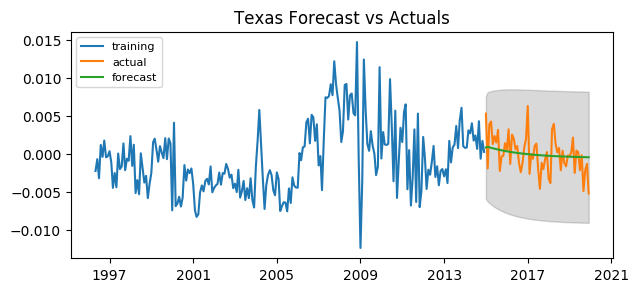

RMSE: 0.0022560500287670186
                              ARMA Model Results                              
Dep. Variable:                  Texas   No. Observations:                  224
Model:                     ARMA(1, 2)   Log Likelihood                 951.701
Method:                       css-mle   S.D. of innovations              0.003
Date:                Mon, 30 Mar 2020   AIC                          -1893.401
Time:                        19:25:41   BIC                          -1876.343
Sample:                    05-01-1996   HQIC                         -1886.515
                         - 12-01-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0005      0.001     -0.416      0.678      -0.003       0.002
ar.L1.Texas     0.9548      0.026     36.045      0.000       0.903       1.007
ma.L1.Texas    -0.60

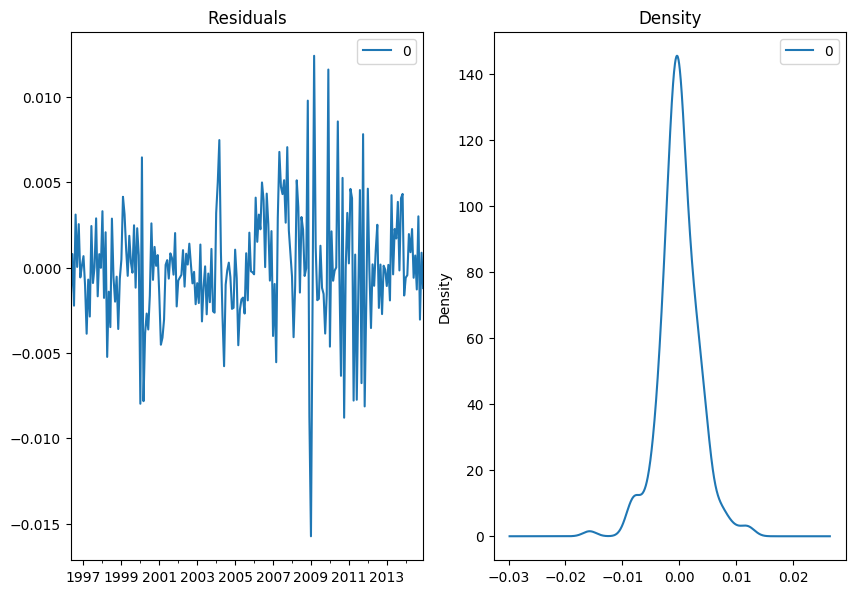

In [109]:
#forecastvalidation('District of Columbia',order=(2,0,1))
#forecastvalidation('California',order=(1,1,1))
#forecastvalidation('New York',order=(0,1,2))
#forecastvalidation('Florida',order=(0,1,1))
forecastvalidation('Texas',order=(1,0,2))
#forecastvalidation('Virginia',order=(0,1,2))

The residual shows no pattern and it is with zero mean.

#### 6. Final Forecasting

In [123]:
import csv
def predict_5years(state,order): # order = (2,1,1) etc
    
    model = ARIMA(df_monthly_returns[state].dropna(), order=order) 
    #model = statsmodels.tsa.statespace.sarimax.SARIMAX(train, order=(2,0,1), seasonal_order=(2,0,1,12))
    fitted = model.fit(disp=-1)  

    # Forecast next 5 years (Year 2020-2025)
    fc_5year = fitted.predict(start='2020-01',end='2025-01')
    
    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(df_monthly_returns[state])
    plt.plot(fc_5year, color='red')

    plt.title('Final Forecast of ' + state + ': Return for Next 5 Years')
    plt.show()
    
    # To calculate the housing price for 5 years from now
    predicted_price=[]
    final_price = df_zillow[state][-1] # (initial value)
    for i in fc_5year:
        final_price += i * final_price
        predicted_price.append(final_price)
    
    # write the list of predicted_prices to a csv file
    with open(state+' predicted.csv', 'w', newline='') as myfile:
        wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
        wr.writerow(predicted_price)
        
    # Assume the current price is the last price of the dataset 
    current_price = df_zillow[state][-1] 
    
    print(state + ': ')
    print('current_price: ' + str(current_price) + '\t')
    print('final_price: ' + str(round(final_price,2)))
    print('Total return in 5 years is ' + str(round((final_price/current_price - 1) * 100,3)) + '%.')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


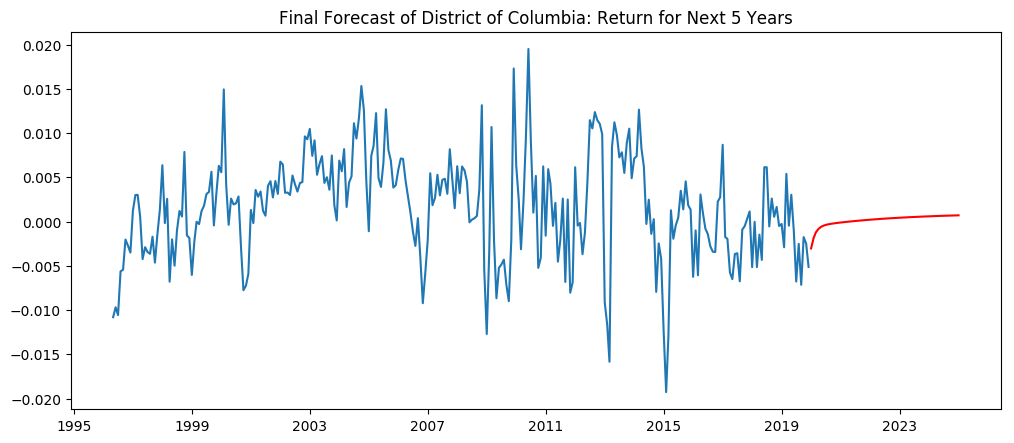

District of Columbia: 
current_price: 738025.0	
final_price: 745288.17
Total return in 5 years is 0.984%.


In [129]:
#predict_5years('District of Columbia',order=(2,0,1))
#predict_5years('California',order = (1,1,1)) 
#predict_5years('Florida',order = (0,1,1)) 
#predict_5years('New York',order = (0,1,2)) 
#predict_5years('Texas',order=(1,0,2)) 
#predict_5years('Virginia',order=(0,1,2)) 

#### 7. Summary 

Total Return for 5 years: 

    1. Florida: 0.053%
    2. District of Columbia: 0.984%
    3. California: 0.016%
    4. New York: 0.159%
    5. Virginia: 0.258%
    6. Texas: -6.909%

After performing time series analysis on 6 states and foracasting total returns for up to 5 years, 
I recommend people who are interested in real estate investment can consider Florida based on its return.

However, this performance is solely based on its historic monthly returns. The past performance does not necessarily predict future outcomes. To achieve a better result, other external factors should be taken into account. 